## Importamos librerias
Paso necesario para trabajar con herramientas de python que nos permiten hacer analisis, graficas, etc.

In [104]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv("20211220_EVALUACION_DOCENTE_2020_20210707_PUBL.csv",sep=";") #Creamos dataframe con datos 
df.head(5) # Visualizamos las primeras 5 filas del dataframe para ver los datos

,AGNO_EVAL,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,...,ESTADO_ESTAB,MRUN,DOC_GENERO,DOC_FEC_NAC,NIVEL,PF_PJE,PF_ESC,PF_Cat_Carrera,INSTR_PJE,INSTR_ESC
0,2020,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,15,151,15101,ARICA,151,ARICA,...,1,2506691,1,197703,ECE,"2,79",C,B,"3,07",D
1,2020,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,15,151,15101,ARICA,151,ARICA,...,1,15428050,2,197306,ECE,"2,92",C,B,"3,15",D
2,2020,4,3,LICEO OCTAVIO PALMA PEREZ,15,151,15101,ARICA,151,ARICA,...,1,11465866,2,196907,EM,"2,6",C,B,"2,66",C
3,2020,5,1,JOVINA NARANJO FERNANDEZ,15,151,15101,ARICA,151,ARICA,...,1,13354326,1,196109,EM,"3,08",D,A,"3,35",D
4,2020,9,4,ESCUELA REPUBLICA DE ISRAEL,15,151,15101,ARICA,151,ARICA,...,1,6054839,2,198905,EE,"1,34",I,E,"2,2",B


## Tarea 1: Limpieza y Preparación de Datos
1.Identificación de valores faltantes: Revisa la base de datos y verifica si hay valores faltantes en las variables clave, como PF_PJE (Puntaje Portafolio) o INSTR_PJE (Puntaje Final en base a resultados en instrumentos). Si encuentras valores faltantes, decide cómo manejarlos (eliminación, imputación, etc.).

2.Normalización de datos: Asegúrate de que todas las variables numéricas estén en el formato correcto (por ejemplo, fechas en formato AAAAMMDD). Si es necesario, convierte las variables categóricas a factores o códigos numéricos.

## Respuesta Tarea 1

In [106]:
df['PF_PJE'] = df['PF_PJE'].str.replace(',', '.').astype(float)
df['INSTR_PJE'] = pd.to_numeric(df['INSTR_PJE'].str.replace(',', '.').str.strip(),errors='coerce')
df = df[df['INSTR_PJE'] != -1]
df = df.dropna()

# Limpieza y Preparación de Datos de Evaluación Docente

De acuerdo a la información dada por el pdf, analizamos el tipo de dato de cada columna, identificando tres casos principales:

1. **Columna faltante**: En el archivo CSV no existe la columna 'NOM_REG_RBD_A' mencionada en el PDF.

2. **Discrepancia de tipo de dato**: La columna 'NIVEL' debería ser numérica según la documentación, pero está como texto. No se modificará ya que no afecta nuestro análisis.

3. **Columnas numéricas almacenadas como texto**: Las columnas 'PF_PJE' y 'INSTR_PJE' requirieron conversión.

Para la columna 'PF_PJE':
- Se reemplazó la coma por punto decimal usando `str.replace(',', '.')`
- Se convirtió al tipo float con `astype(float)`

Para la columna 'INSTR_PJE':
- Se reemplazó la coma por punto decimal con `str.replace(',', '.')`
- Se eliminaron espacios en blanco con `str.strip()`
- Se convirtió a tipo numérico con `pd.to_numeric(..., errors='coerce')` para manejar valores problemáticos como NaN

En la columna 'INSTR_PJE' se identificaron valores en {-1} ∪ (1,4). Los valores -1 corresponden a docentes de colegios particulares, que fueron excluidos del análisis mediante `df = df[df['INSTR_PJE'] != -1]`.

Finalmente, se eliminaron todas las filas con valores NaN usando `df.dropna()`.

## Tarea 2: Análisis Exploratorio de Datos (EDA)

1. Distribución de puntajes: Realiza un análisis de la distribución de los puntajes de los docentes en las variables PF_PJE y INSTR_PJE. Usa histogramas o gráficos de densidad para visualizar la distribución.
2. Comparación por género: Analiza si hay diferencias significativas en los puntajes de evaluación entre docentes de diferentes géneros (DOC_GENERO). Puedes usar pruebas estadísticas como la prueba t o ANOVA, dependiendo de la distribución de los datos.
3. Análisis por región: Agrupa los datos por región (COD_REG_RBD) y compara los puntajes promedio de los docentes en cada región. Visualiza los resultados usando un gráfico de barras o un mapa geográfico.

In [108]:
names = {
    'AGNO_EVAL': 'Año de Evaluación',
    'RBD': 'Rol Base de Datos',
    'DGV_RBD': 'Dígito Verificador RBD',
    'NOM_RBD': 'Nombre del Establecimiento',
    'COD_REG_RBD': 'Código Región',
    'COD_PRO_RBD': 'Código Provincia',
    'COD_COM_RBD': 'Código Comuna',
    'NOM_COM_RBD': 'Nombre Comuna',
    'COD_DEPROV_RBD': 'Código Departamento Provincial',
    'NOM_DEPROV_RBD': 'Nombre Departamento Provincial',
    'COD_DEPE': 'Dependencia del Establecimiento',
    'COD_DEPE2': 'Dependencia Detallada',
    'RURAL_RBD': 'Ruralidad',
    'ESTADO_ESTAB': 'Estado del Establecimiento',
    'MRUN': 'RUN del Docente',
    'DOC_GENERO': 'Género del Docente',
    'DOC_FEC_NAC': 'Fecha Nacimiento Docente',
    'NIVEL': 'Nivel de Enseñanza',
    'PF_PJE': 'Puntaje Portafolio',
    'PF_ESC': 'Nivel de Desempeño Portafolio',
    'PF_Cat_Carrera': 'Categoría Carrera Docente',
    'INSTR_PJE': 'Puntaje Final Instrumentos',
    'INSTR_ESC': 'Nivel Final Instrumentos'
}

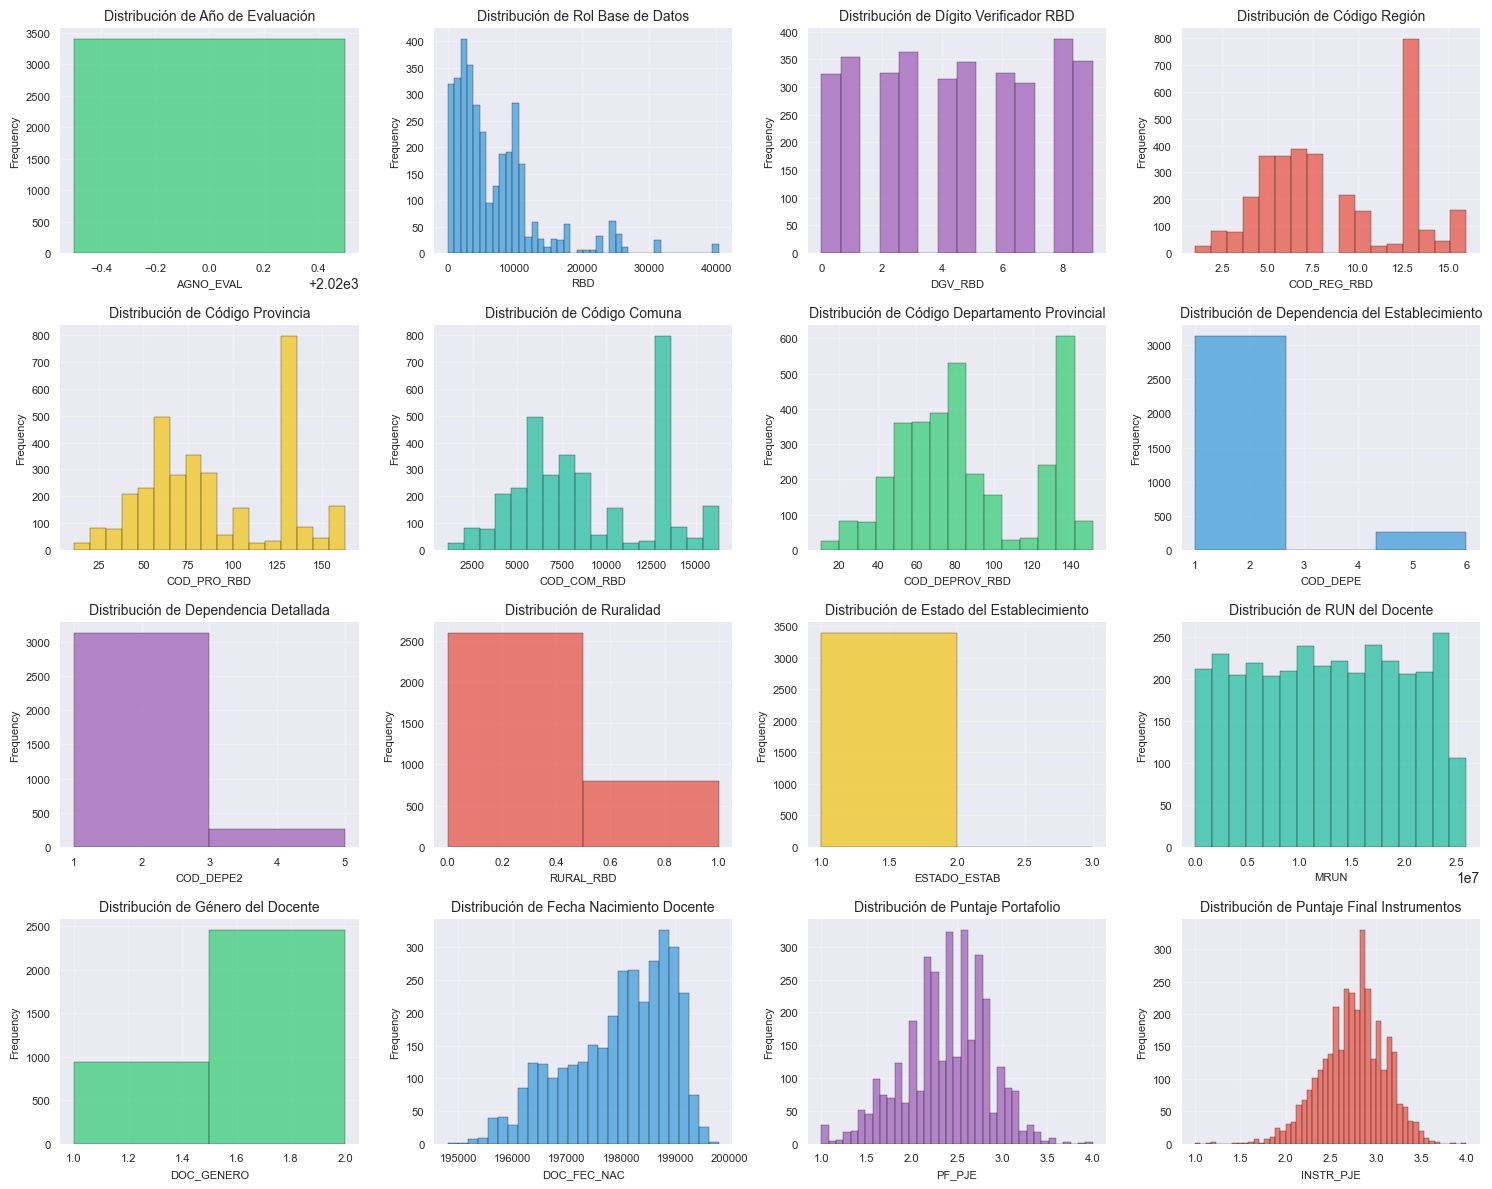

In [114]:
plt.style.use('seaborn-v0_8')  # Changed from 'seaborn' to 'ggplot' which is a built-in style
# Create figure and subplots with better spacing
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
# fig.suptitle('Distribution of Variables', fontsize=16, y=0.95)

# Flatten axes array for easier iteration
axes = axes.ravel()

# Numerical columns to plot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Custom colors
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f', '#1abc9c']

# Plot each numeric column with individual settings
for idx, col in enumerate(numeric_cols):
    if idx < len(axes):  # Ensure we don't exceed available subplots
        # Determine optimal number of bins based on data
        if df[col].nunique() < 10:
            bins = df[col].nunique()
        else:
            bins = 'auto'
            
        # Create histogram
        df[col].hist(ax=axes[idx], 
                    bins=bins,
                    color=colors[idx % len(colors)],
                    alpha=0.7,
                    edgecolor='black')
        
        # Customize each subplot
        title = names.get(col, col)
        axes[idx].set_title(f'Distribución de {title}', fontsize=10)
        axes[idx].set_xlabel(col, fontsize=8)
        axes[idx].set_ylabel('Frequency', fontsize=8)
        axes[idx].tick_params(labelsize=8)
        axes[idx].grid(True, alpha=0.3)

# Remove empty subplots if any
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()